# Lattice Dynamics and Density Functional Perturbation Theory - Quasi-Harmonic Level

The script 'thermodyanmics.py' is a comprehensive module for lattice dynamics based on harmonic and quasi-harmonic level of theory. For simplicity, this tutorial is focused only on quasi-harmonic fittings of phonons and thermodynamics of that level. For harmonic part, please refer to 'thermodynamics-QHA'.

**Classes used in this tutorial are defined in 'crystal_functions.thermodynamics'. Documentations and source codes are attached at the bottom of this page.**

## Tests
2 tests are performed based on the same method.

1. 0 pressure equilibrium volumes of Form I paracetamol, ranging from 0K to 330K. Compared with experimental measurements ([C. C. Wilson, Z. Kristallogr. Cryst. Mater., 2000, 215, 693–701](https://www.degruyter.com/document/doi/10.1524/zkri.2000.215.11.693/html)).  
2. 0~1GPa thermodynamic properties of Form I paracetamol, ranging from 0K to 330K. As an illustration of the complete output file. 

Method explanation:

* Analytical expression of electron total energy is fitted to the third-order Birch-Murnaghan equation of states.  
* Analytical expression of phonon frequencies is fitted to the second- and third-order polynomials. The third -order polynomial is used for thermodynamics.  
* Gibbs free energy G(T, p) is minimized with BFGS algorithm without boundary conditions. 

**N.B.** This module is still under development. Planned update: Gruneisen model and anisotropic thermal expansion.

### 0\~330K, 0 pressure thermodyanmics
This part is used for comparison with experimental measurements, in order to illustrate effectiveness of QHA method implemented here. 4 $\Gamma$-point phonon calculations of Form I paracetamol with various volumes are used ('QHA' folder in 'data/').

In [2]:
import numpy as np
from crystal_functions.thermodynamics import Quasi_harmonic

file_list = ['data/QHA/f1-m4freq.out', 'data/QHA/f1-p4freq.out',
             'data/QHA/f1-p8freq.out', 'data/QHA/f1-r0freq.out']
tempt = np.array([20, 50, 80, 150, 200, 250, 330], dtype=float)
press = np.linspace(0, 1, 10)

qha = Quasi_harmonic().from_HA_files(file_list, write_out=True, filename='data/f1-thermo-QHA.dat')
qha.thermodynamics(temperature=tempt, pressure=press, 
                   eos_method='birch_murnaghan', freq_method='polynomial',
                   poly_order=[2, 3], min_method='BFGS', write_out=True, filename='data/f1-thermo-QHA.dat')

         Volume:  724.6544801689456   Temperature:  20.0   Pressure:  0.5555555555555556
         Volume:  714.3109546967437   Temperature:  20.0   Pressure:  0.6666666666666666
         Volume:  709.4722395817672   Temperature:  20.0   Pressure:  0.7777777777777777
         Volume:  698.3276409132774   Temperature:  20.0   Pressure:  0.8888888888888888


/home/huanyu/Software/anaconda3/envs/crystal_py3.8/lib/python3.8/site-packages/crystal_functions/thermodynamics.py:177: RuntimeWarning: overflow encountered in square
  temperature * expon / (expon - 1)**2 * 1000


         Volume:  692.016074681912   Temperature:  20.0   Pressure:  1.0
         Volume:  736.5906675225253   Temperature:  50.0   Pressure:  0.4444444444444444
         Volume:  728.7279307334819   Temperature:  50.0   Pressure:  0.5555555555555556
         Volume:  707.3540530339408   Temperature:  50.0   Pressure:  0.6666666666666666
         Volume:  703.4231867415023   Temperature:  50.0   Pressure:  0.7777777777777777
         Volume:  692.5316504672961   Temperature:  50.0   Pressure:  0.8888888888888888
         Volume:  699.6454289345511   Temperature:  50.0   Pressure:  1.0
         Volume:  735.1838148581135   Temperature:  80.0   Pressure:  0.4444444444444444
         Volume:  729.3661067073817   Temperature:  80.0   Pressure:  0.5555555555555556
         Volume:  706.9847532034673   Temperature:  80.0   Pressure:  0.6666666666666666
         Volume:  692.9376030779514   Temperature:  80.0   Pressure:  0.7777777777777777
         Volume:  692.6195243907358   Temperature:  

Warning messages are printed out since the fitted volume data exceeds the sampled volume data, which might cause inaccuracies due to the extrapolated volume & phonon frequencies. According to warning messages, smaller volumes should be sampled when generating the phonon frequency data. 

No warning message is printed out for 0 pressure thermodynamics. Fitted data and expermiental data are plotted for comparison in the following code block. The difference is within 5 cm^3/mol, which is a good agreement with experimental measurements. The increased thermal expansion around 50\~150K is reproduced.

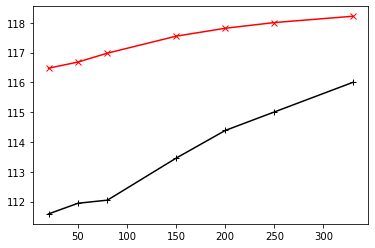

In [4]:
import matplotlib.pyplot as plt

exp = np.array([111.5836, 111.9421, 112.0463, 113.4580, 114.3871, 
                115.0082, 116.0031])
qha_zerop = qha.equilibrium_volume[:, 0]
# Angstrom^3 to cm^3/mol
qha_zerop = qha_zerop * 0.602214 / 4

plt.plot(tempt, exp, '+-k')
plt.plot(tempt,qha_zerop, 'x-r')

### 0\~330K, 0\~1GPa thermodyanmics
The format of the output file obtained from the previous calculation (f1-thermo-QHA.dat) is briefly explained in this section. Generally speaking, titles of each section are printed in upper case, with '\#' at the beginning of the line. Brief explanations, if necessary, are given in the following lines in the lower case. 

Following information is reported in sequence:

#### Combined HA phonon data

1. Volumes of sampled HA phonons  
2. DFT total energies of sampled HA phonons  
3. Mode frequencies as functions of volumes

```
# COMBINED QHA DATA
## SAMPLED VOLUMES(ANGSTROM^3) =
## DFT TOTAL ENERGIES(KJ/MOL CELL) =
## DFT TOTAL ENERGIES(KJ/MOL CELL) =

## COMBINED MODES

### FREQUENCIES AT QPOINT #

  Mode #    Volume(Angstrom^3)        Frequency(THz)
```

#### Equation of states fitted for DFT total energy
To get the analytical expression of internal energy as the function of volume, U(V), excluding the zero point energy, the DFT total energy is fitted to equation of states (EoS) specified. The [pymatgen.analysis.eos module](https://pymatgen.org/pymatgen.analysis.eos.html) is integrated, so EoSs supported there are supported here as well. 

The following parameters are fitted:

1. $E_{0}$, The equilibrium internal energy excluding phonon vibrations.  
2. $V_{0}$, The equilibrium volume fitted to minimize the internal energy. Compared to $V_{0}$ that minimizes Gibbs free energy, there is a famous 'volume shift' problem of this value.  
3. $B_{0}$, The equilibrium bulk modulus.  
4. $B_{1}=\left(\frac{\partial B_{0}}{\partial p}\right)_{T}$

```
# EQUATION OF STATES FITTED FOR ELECTRON TOTAL ENERGY: birch_murnaghan
  Electron total energy is fitted as the function of volume, of which the
  formalism is given by equation of states.

      E0(kJ/mol)  V0(Angstrom^3)     B0(GPa)          B1
```

#### QHA thermodynamic properties

Basic thermodynamic properties including equilibrium volumes $V(T,p)$, Helmholtz free energy $F(T,V)$, Gibbs free energy $G(T,p)$ and entropy $S(T,V)$ are printed out at finite temperatures and pressures. 

So far, $V(T,p)$ is the basic quantity of all the other thermodynamic properties, which is obtained by numerically minimizing the Gibbs free energy of harmonic phonons (see [thermodynamics-HA](https://github.com/crystal-code-tools/crystal_functions/blob/main/tutorial/thermodynamics-HA.ipynb) for analytical equations). 

The following information is printed out:

1. The order of polynomials used for QHA thermodynamics, which is automatically chosen based on the average R^2.  
2. Algorithm used for minimizing Gibbs free energy.  
3. If applicable, volume boundaries set for Gibbs free energy minimization.  
4. Thermodynamic properties at constant pressure.

```
# QHA THERMODYNAMIC PROPERTIES
  Thermodynamic properties fitted by QHA.

## FREQUENCY POLYNOMIAL ORDER:
## EQUILIBRIUM VOLUME MINIMISATION: 
## THERMODYNAMIC PROPERTIES AT         GPa

      T(K)     Vol(Angstrom^3)   Helmholtz(kJ/mol)       Gibbs(kJ/mol)    Entropy(J/mol*K)
```